In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1) Dataset Overview 

The dataset contains physicochemical properties of red wines along with their quality rating (0–10 scale, but here it mostly ranges from 3–8).

Shape: 1599 rows × 12 columns.

No missing values were found.

Features are numeric, representing chemical tests (pH, alcohol, acidity, etc.).

Target variable: quality (integer score).

In [4]:
df.shape       # number of rows and columns
df.info()      # data types + null values
df.describe()  # summary stats
df.isnull().sum()  # missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

2. Descriptive Statistics

The summary statistics show variation across features:

Alcohol ranges from ~8% to ~14%, with mean around 10.

Volatile acidity has a mean of ~0.53, but some wines are much higher (possible outliers).

Residual sugar and citric acid show skewness and a few extreme values.

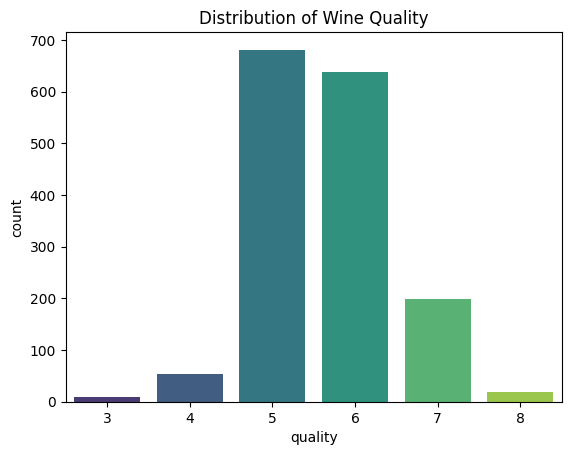

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.show()


3. Distribution of Wine Quality
Most wines are rated between 5 and 6, with very few wines rated 3 or 8.
This shows a class imbalance, meaning the dataset is skewed toward average-quality wines.

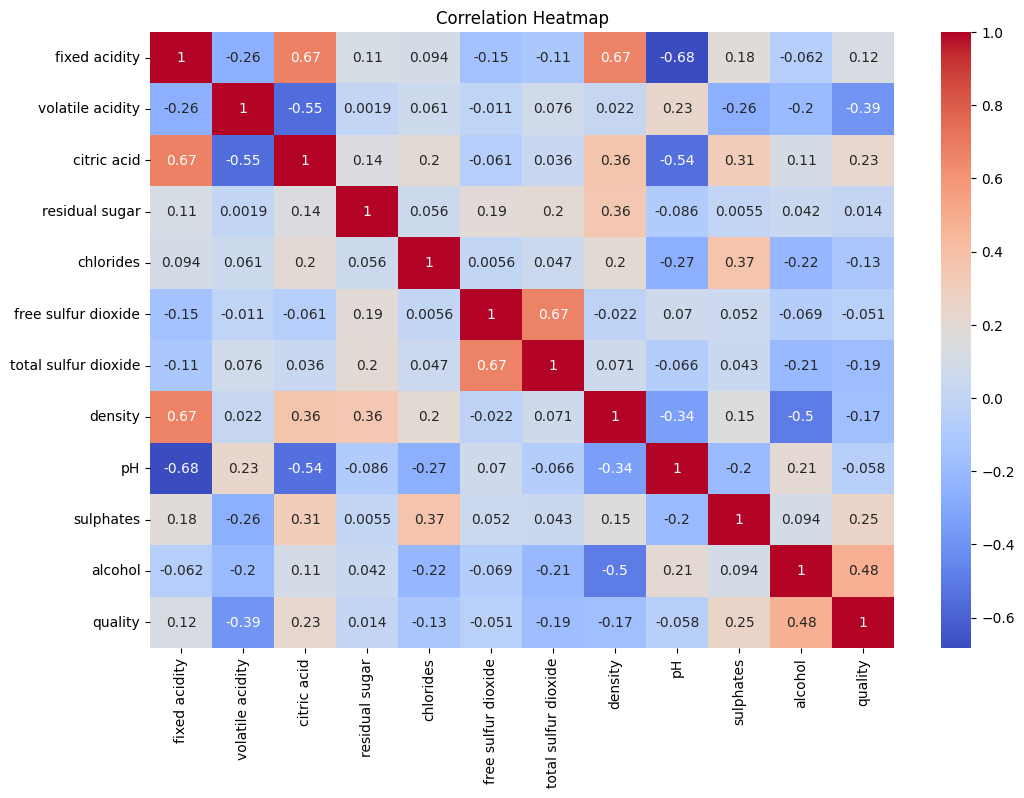

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


4. Correlation Heatmap


Key observations:

Alcohol has a positive correlation with quality (better wines tend to have higher alcohol content).

Volatile acidity is negatively correlated with quality (high acidity lowers quality).

Citric acid and sulphates show mild positive correlation with quality.

Many chemical properties are interrelated (e.g., density and alcohol are strongly negatively correlated).

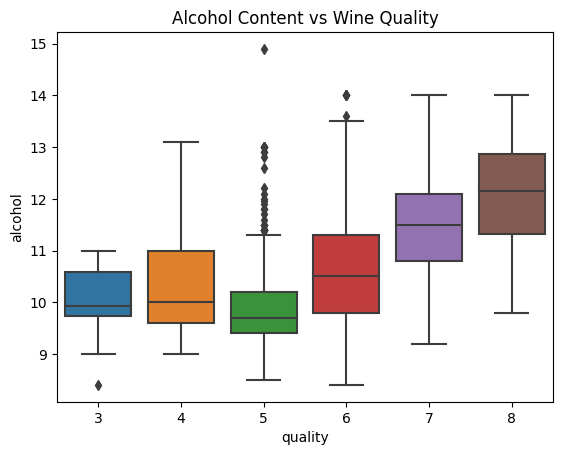

In [9]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol Content vs Wine Quality")
plt.show()




5. Alcohol vs Quality



Higher quality wines (7–8) generally have higher alcohol content than lower quality wines (3–4).
This confirms alcohol is a strong quality indicator.

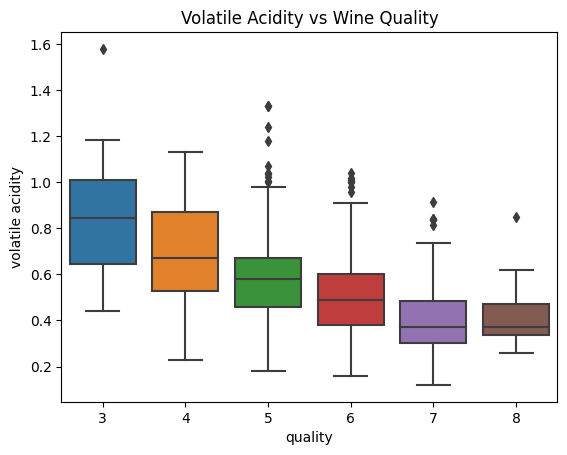

In [11]:
sns.boxplot(x='quality', y='volatile acidity', data=df) 
plt.title("Volatile Acidity vs Wine Quality") 
plt.show()

6. Volatile Acidity vs Quality

(After sns.boxplot volatile acidity)

Wines with higher volatile acidity tend to have lower quality ratings.
This feature seems to negatively affect taste and perceived quality.

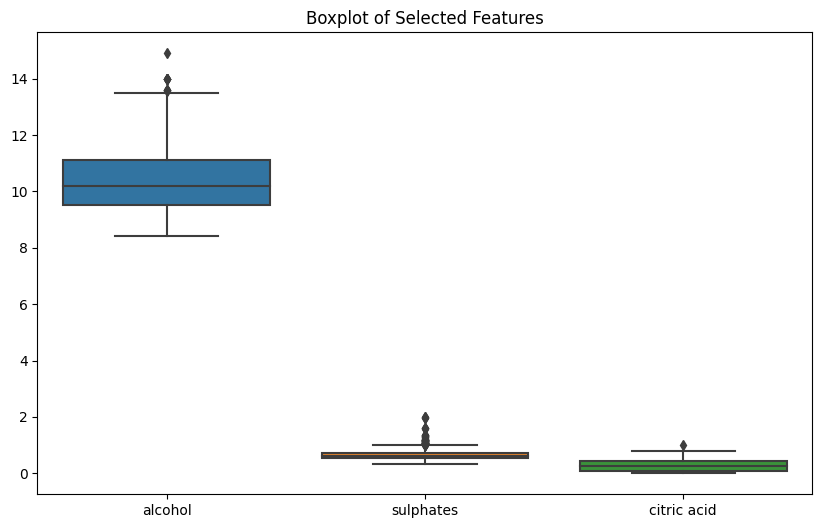

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['alcohol', 'sulphates', 'citric acid']])
plt.title("Boxplot of Selected Features")
plt.show()


7. Boxplots of Selected Features

(After last boxplot with alcohol, sulphates, citric acid)

Alcohol shows wide variation and is the most spread-out feature.

Sulphates mostly cluster between 0.4–0.8, with some outliers.

Citric acid has many wines with near-zero content, but higher values may improve quality.